C:\Users\FTrou\AppData\Local\Temp\ipykernel_24024\3643284511.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  solar_ts = pd.Series(df['System Production (Wh)'].values, index=pd.date_range(start='2019-01-01', periods=len(df), freq='M'))


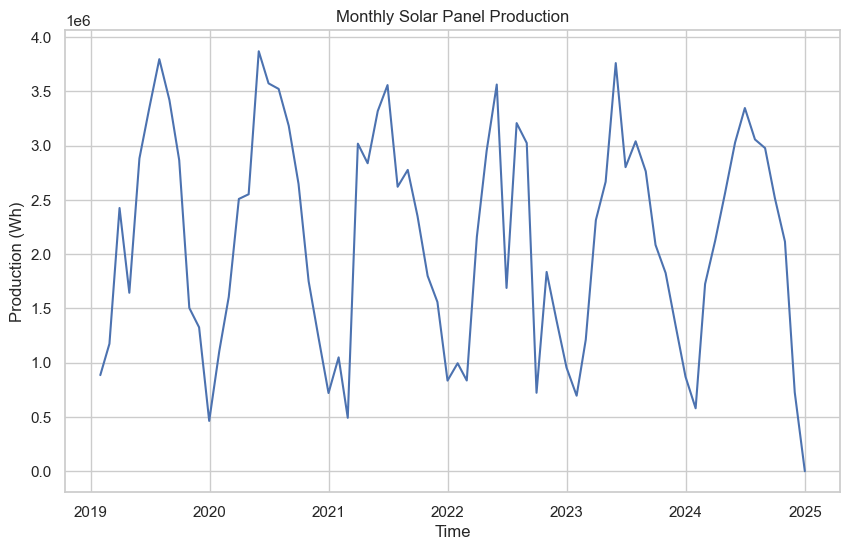

ADF Statistic: -1.243823877307874
p-value: 0.6544655750038373
ADF Statistic (Differenced): -3.28777796592524
p-value (Differenced): 0.015433717866852072


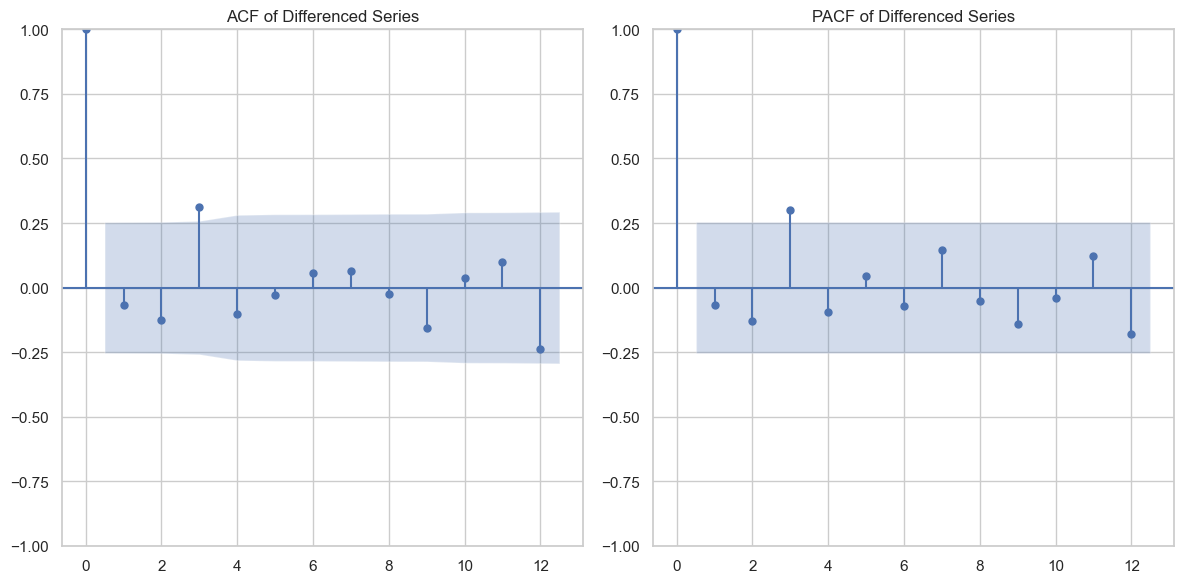

Manual Model AIC: 1749.233134700236
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   72
Model:             ARIMA(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -871.617
Date:                           Sat, 07 Dec 2024   AIC                           1749.233
Time:                                   20:45:18   BIC                           1755.466
Sample:                               01-31-2019   HQIC                          1751.666
                                    - 12-31-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2015      0.210     -0.959      0.337      -0.613       0.210
ma.L1  

C:\Users\FTrou\AppData\Local\Temp\ipykernel_24024\3643284511.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=solar_ts.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'), forecast_manual, label="Forecast")


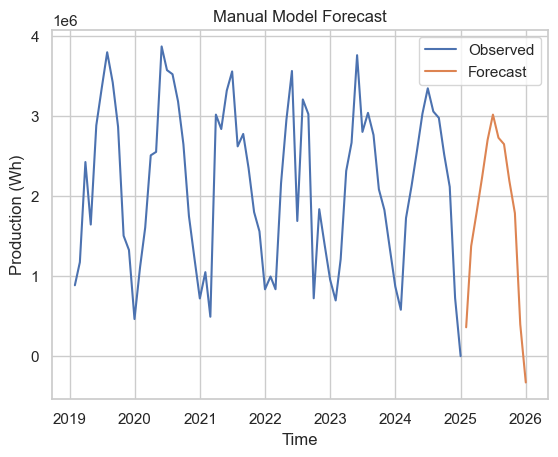

C:\Users\FTrou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\FTrou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\FTrou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting aut

Best Parameters from Grid Search: (np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1))
Best AIC from Grid Search: 1743.0476862272146


C:\Users\FTrou\AppData\Local\Temp\ipykernel_24024\3643284511.py:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=solar_ts.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'), forecast_grid_search, label="Forecast")


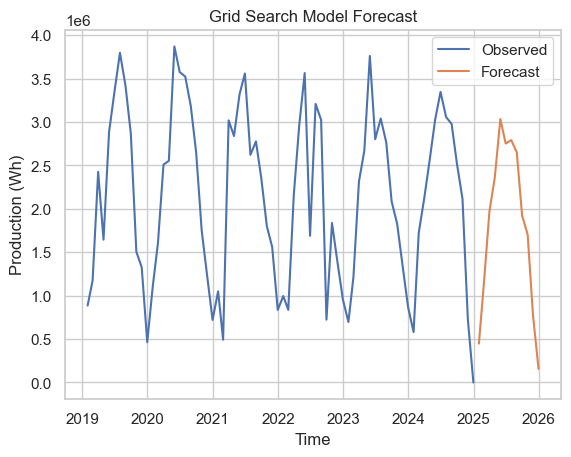

Manual Model AIC: 1749.233134700236
Grid Search Model AIC: 1743.0476862272146


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set Seaborn style
sns.set(style="whitegrid")

# Load the data
file_path = r"C:\Users\FTrou\Documents\GitHub\WitSolar\Data\Solar.xlsx"
df = pd.read_excel(file_path)

# Convert the column 'System Production (Wh)' to a time series
solar_ts = pd.Series(df['System Production (Wh)'].values, index=pd.date_range(start='2019-01-01', periods=len(df), freq='M'))

# Initial visualization using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=solar_ts.index, y=solar_ts.values)
plt.title("Monthly Solar Panel Production")
plt.xlabel("Time")
plt.ylabel("Production (Wh)")
plt.show()

# ADF test on original series
adf_result = adfuller(solar_ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Seasonal differencing (lag = 12)
seasonal_diff_ts = solar_ts.diff(12).dropna()

# ADF test on differenced series
adf_result_diff = adfuller(seasonal_diff_ts)
print(f"ADF Statistic (Differenced): {adf_result_diff[0]}")
print(f"p-value (Differenced): {adf_result_diff[1]}")

# ACF and PACF for parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(seasonal_diff_ts, lags=12, ax=plt.gca())
plt.title("ACF of Differenced Series")

plt.subplot(122)
plot_pacf(seasonal_diff_ts, lags=12, ax=plt.gca())
plt.title("PACF of Differenced Series")

plt.tight_layout()
plt.show()

# Fit SARIMA model (Manual selection)
manual_model = ARIMA(solar_ts, order=(1, 1, 1), seasonal_order=(0, 1, 0, 12))
manual_model_fit = manual_model.fit()

# Model summary and AIC
print(f"Manual Model AIC: {manual_model_fit.aic}")
print(manual_model_fit.summary())

# Forecasting for the Manual Model
forecast_manual = manual_model_fit.forecast(steps=12)
plt.plot(solar_ts, label="Observed")
plt.plot(pd.date_range(start=solar_ts.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'), forecast_manual, label="Forecast")
plt.title("Manual Model Forecast")
plt.xlabel("Time")
plt.ylabel("Production (Wh)")
plt.legend()
plt.show()

# Grid Search for the Best Model Parameters using Numpy for Efficiency

# Define possible values for AR, MA, and seasonal components (0 or 1)
param_grid = np.array(np.meshgrid([0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1])).T.reshape(-1, 6)

# Initialize variables to track the best model
best_aic = np.inf
best_model = None
best_params = None

# Loop over all possible parameter combinations in the grid
for p, d, q, P, D, Q in param_grid:
    try:
        model = ARIMA(solar_ts, order=(p, d, q), seasonal_order=(P, D, Q, 12))
        model_fit = model.fit()
        model_aic = model_fit.aic
        if model_aic < best_aic:
            best_aic = model_aic
            best_model = model_fit
            best_params = (p, d, q, P, D, Q)
    except:
        continue

print(f"Best Parameters from Grid Search: {best_params}")
print(f"Best AIC from Grid Search: {best_aic}")

# Forecasting for the Grid Search Model
forecast_grid_search = best_model.forecast(steps=12)
plt.plot(solar_ts, label="Observed")
plt.plot(pd.date_range(start=solar_ts.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'), forecast_grid_search, label="Forecast")
plt.title("Grid Search Model Forecast")
plt.xlabel("Time")
plt.ylabel("Production (Wh)")
plt.legend()
plt.show()

# Compare AICs of both models
print(f"Manual Model AIC: {manual_model_fit.aic}")
print(f"Grid Search Model AIC: {best_aic}")
